In [ ]:
import os

In [ ]:
%cd /content/drive/My Drive/Project/Data Science/PeduliLindungi Sentimen Analisis

/content/drive/My Drive/Project/Data Science/PeduliLindungi Sentimen Analisis


In [ ]:
os.listdir()

['Sentiment Analysis using ML and DL model.ipynb',
 'App Review Scraping.ipynb',
 'dataset',
 'model',
 '.ipynb_checkpoints',
 '__pycache__',
 'preprocessing.py',
 'PeduliLindungi Sentimen Analysis Pre Train Model.ipynb']

In [ ]:
print('dataset')
os.listdir('dataset')

dataset


['Datacampur.xlsx',
 'MisterAladin.csv',
 'Pegipegi.csv',
 'DataTrain.csv',
 'traveloka-uji.csv',
 'tiketcom-uji.csv',
 'pegipegi-uji.csv',
 'misteraladin-uji.csv',
 'apps.csv',
 'app_reviews.csv',
 'app_reviews.gsheet']

In [ ]:
!pip install PySastrawi
!pip install wordcloud

     |████████████████████████████████| 215kB 2.7MB/s 


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from preprocessing import *

import nltk

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def all_preprocessing(text):
  # Fungsi dari module preprocessing
  text = remove_punctuation(text)
  text = lower_case(text)
  text = remove_number(text)
  text = remove_spaces(text)
  text = remove_stopword(text)
  text = stemming(text)
  text = preprocess(text)
  return text

In [ ]:
app_info = pd.read_csv('dataset/apps.csv')
app_reviews = pd.read_csv('dataset/app_reviews.csv')

## Aplikasi

In [ ]:
app_info

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,PeduliLindungi,Aplikasi PeduliLindungi adalah aplikasi yang d...,Aplikasi PeduliLindungi adalah aplikasi yang d...,"Let's care, protect, help stop the spread of C...","Let&#39;s care, protect, help stop the spread ...","1,000,000+",1000000,4.130068,36820,17641,"[4328, 1342, 2795, 5099, 23254]",0,True,USD,False,NaN,NaN,NaN,NaN,7.2M,5.0,5.0 and up,Kementerian Kominfo,Kementerian+Kominfo,pedulilindungi@kominfo.go.id,https://www.pedulilindungi.id/,"Jl. Medan Merdeka Barat no. 9, Jakarta 10110",https://www.pedulilindungi.id/#cara-kerja,5157417495804423999,Medical,MEDICAL,https://lh3.googleusercontent.com/8ihjhDymV5Yu...,https://lh3.googleusercontent.com/BF90FJqUjimN...,['https://lh3.googleusercontent.com/dk1uK6YXqL...,NaN,NaN,Everyone,NaN,NaN,NaN,NaN,1593056875,2.2.2,NaN,NaN,com.telkom.tracencare,https://play.google.com/store/apps/details?id=...


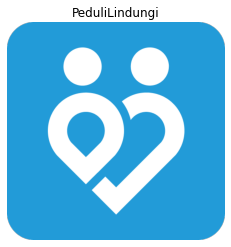

In [ ]:
img = app_info['icon'][0]
app_title = app_info['title'][0]

img = plt.imread(img)
plt.title(app_title)
plt.axis("off") 
plt.imshow(img)
plt.show()

In [ ]:
app_info = app_info.dropna(axis = 'columns')

In [ ]:
# describsi aplikasi
app_columns = app_info.columns
for column in app_columns:
  print(f"{column} : {app_info[column][0]}")
  print("----------------------------------------")

title : PeduliLindungi
----------------------------------------
description : Aplikasi PeduliLindungi adalah aplikasi yang dirancang Kementerian Komunikasi dan Informatika (Kominfo) dan Kementerian BUMN untuk digunakan Kementerian Kesehatan dan Gugus Tugas dalam mengatasi pandemi COVID-19 di Indonesia. 

PeduliLindungi adalah aplikasi yang dikembangkan untuk menghentikan penularan Coronavirus Disease (COVID-19). Aplikasi ini mengandalkan kepedulian (peduli) dan partisipasi masyarakat untuk saling membagikan data lokasinya saat bepergian agar penelusuran riwayat kontak dengan penderita COVID-19 dapat dilakukan.

PeduliLindungi menggunakan bluetooth Anda untuk merekam informasi yang dibutuhkan. Pertukaran data akan terjadi ketika ada gadget lain dalam radius bluetooth yang juga terdaftar di PeduliLindungi. PeduliLindungi selanjutnya akan mengidentifikasi orang-orang yang pernah berada dalam jarak dekat dengan orang yang dinyatakan positif COVID-19 atau PDP (Pasien Dalam Pengawasan) dan O

## Review Aplikasi

In [ ]:
app_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOGWzU6RFApdwlJf-P02uck3f-sPMfDtO7jLFkS...,devan sir,https://lh3.googleusercontent.com/a-/AOh14GgDj...,"Gak bisa kirim OTP, padahal henpon saya samsun...",1,2,2.2.2,2020-07-22 13:28:57,"Halo Devan, Terima kasih atas tanggapan dan du...",2020-07-23 10:22:06,most_relevant,com.telkom.tracencare
1,gp:AOqpTOHtgBV16_5maItYQkIOAMjQO3jpDS2xp36Om2i...,M. Firdan Juliansyah,https://lh3.googleusercontent.com/-O0KwmBYn9D8...,"Ga bisa kirim OTP, katanya tidak ada koneksi i...",1,131,2.2.2,2020-06-29 07:42:12,"Halo, Firdan. \nKami mohon maaf atas ketidakny...",2020-06-29 06:19:31,most_relevant,com.telkom.tracencare
2,gp:AOqpTOGJmo2_D75s0LGlm0rI0EOeqawlb94SIGM6QDL...,Hendra Munajah,https://lh3.googleusercontent.com/-qRkHzaujvk8...,Beberapa kelurahan yang berada di wilayah kerj...,1,34,2.2.2,2020-06-27 10:03:12,Halo Hendra\nTerima kasih atas dukungan dan ta...,2020-06-29 09:35:25,most_relevant,com.telkom.tracencare
3,gp:AOqpTOFPoP6zbyyNCFIZ6k2RH4ZhuvhOJiquY6GXtZn...,Mbah Surat,https://lh3.googleusercontent.com/a-/AOh14Giyt...,DATA DARIMANA KELURAHAN KAMI KOK BISA MASUK ZO...,1,20,2.2.2,2020-07-14 13:28:14,"Halo, Mbah Surat. Terima kasih atas dukungan d...",2020-07-15 02:53:11,most_relevant,com.telkom.tracencare
4,gp:AOqpTOE8SeSZA6_IjnBZU879vkSMiWmV-8PO3eSNcCR...,nur aji saputra,https://lh3.googleusercontent.com/a-/AOh14Gj8t...,Maaf sebelumnya adanya amplikasi ini apakah su...,1,13,2.2.2,2020-06-28 13:35:35,"Halo nur aji saputra,\nAplikasi ini Aplikasi R...",2020-06-30 01:53:49,most_relevant,com.telkom.tracencare


In [ ]:
app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1200 non-null   object
 1   userName              1200 non-null   object
 2   userImage             1200 non-null   object
 3   content               1200 non-null   object
 4   score                 1200 non-null   int64 
 5   thumbsUpCount         1200 non-null   int64 
 6   reviewCreatedVersion  1087 non-null   object
 7   at                    1200 non-null   object
 8   replyContent          692 non-null    object
 9   repliedAt             692 non-null    object
 10  sortOrder             1200 non-null   object
 11  appId                 1200 non-null   object
dtypes: int64(2), object(10)
memory usage: 112.6+ KB


In [ ]:
# Bagian content ini yang akan dijadikan obje untuk analisis sentimen
app_reviews['content']

0       Gak bisa kirim OTP, padahal henpon saya samsun...
1       Ga bisa kirim OTP, katanya tidak ada koneksi i...
2       Beberapa kelurahan yang berada di wilayah kerj...
3       DATA DARIMANA KELURAHAN KAMI KOK BISA MASUK ZO...
4       Maaf sebelumnya adanya amplikasi ini apakah su...
                              ...                        
1195                                                  Oke
1196                                              Manfaat
1197    Aplikasinya gimana ina ko tidak bisa masuk pad...
1198                                                 Good
1199                                           Yg terbaik
Name: content, Length: 1200, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
app_reviews['preprocessing'] = app_reviews['content'].apply(lambda x: all_preprocessing(x))

In [ ]:
app_reviews[['content','preprocessing']]

,content,preprocessing
0,"Gak bisa kirim OTP, padahal henpon saya samsun...","[gak, kirim, otp, henpon, samsung, as, udah, p..."
1,"Ga bisa kirim OTP, katanya tidak ada koneksi i...","[ga, kirim, otp, koneksi, internet, pakai, wif..."
2,Beberapa kelurahan yang berada di wilayah kerj...,"[lurah, wilayah, kerja, puskesmas, karawang, c..."
3,DATA DARIMANA KELURAHAN KAMI KOK BISA MASUK ZO...,"[data, darimana, lurah, masuk, zona, merah, be..."
4,Maaf sebelumnya adanya amplikasi ini apakah su...,"[maaf, amplikasi, penuh, standar, sni, akses, ..."
...,...,...
1195,Oke,[oke]
1196,Manfaat,[manfaat]
1197,Aplikasinya gimana ina ko tidak bisa masuk pad...,"[aplikasi, gimana, ina, ko, masuk, padaha, dat..."
1198,Good,[good]


In [ ]:
def remove_bl_word(words):
  blacklist_word = ['yg', 'n', 'nya', 'gak', 'ga','gk','tdk', 'aja', 'tp', 'sy', 'ya', '1', '2']
  for word in words:
    if word in blacklist_word:
      index = words.index(word)
      del words[index]
  return words

In [ ]:
app_reviews['preprocessing'] = app_reviews['preprocessing'].apply(lambda x: remove_bl_word(x))
app_reviews[['content','preprocessing']]

,content,preprocessing
0,"Gak bisa kirim OTP, padahal henpon saya samsun...","[kirim, otp, henpon, samsung, as, udah, pake, ..."
1,"Ga bisa kirim OTP, katanya tidak ada koneksi i...","[kirim, otp, koneksi, internet, pakai, wifi, l..."
2,Beberapa kelurahan yang berada di wilayah kerj...,"[lurah, wilayah, kerja, puskesmas, karawang, c..."
3,DATA DARIMANA KELURAHAN KAMI KOK BISA MASUK ZO...,"[data, darimana, lurah, masuk, zona, merah, be..."
4,Maaf sebelumnya adanya amplikasi ini apakah su...,"[maaf, amplikasi, penuh, standar, sni, akses, ..."
...,...,...
1195,Oke,[oke]
1196,Manfaat,[manfaat]
1197,Aplikasinya gimana ina ko tidak bisa masuk pad...,"[aplikasi, gimana, ina, ko, masuk, padaha, dat..."
1198,Good,[good]


In [ ]:
def count_word(data):
  all_word = []
  for index, value in enumerate(data):
    for term in value:
      all_word.append(term) 
  
  counted_words = Counter(all_word)
  return counted_words      


counted_words = count_word(app_reviews['preprocessing'])
temp = pd.DataFrame(counted_words.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,zona,567
1,aplikasi,498
2,merah,336
3,data,210
4,hijau,195
5,bantu,168
6,update,165
7,lokasi,164
8,daerah,160
9,covid,158


In [ ]:
!pip install squarify

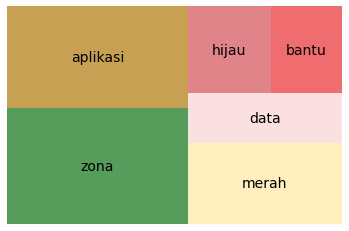

In [ ]:
import squarify

most_common_word = dict(counted_words.most_common(6))
volume = most_common_word.values()
labels = most_common_word.keys()
color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']

plt.rc('font', size=14)
squarify.plot(sizes=volume, label=labels,
              color=color_list, alpha=0.7)
plt.axis('off')

plt.show()

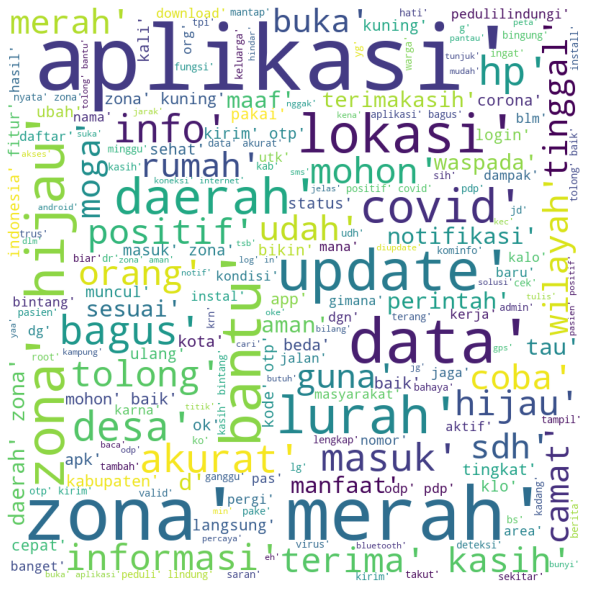

In [ ]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
worcloud_stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in app_reviews['preprocessing']: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = worcloud_stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


## Prediksi

In [ ]:
import joblib
os.listdir('model')

['svm.pickle',
 'knn.pickle',
 'random_forest.pickle',
 '.ipynb_checkpoints',
 'CNN_Sentimen.h5',
 'MNB.pickle',
 'CNB.pickle',
 'BNB.pickle',
 'DecisionTreeClassifier.pickle',
 'LSTM_Sentimen.h5',
 'Hasil Training.csv',
 'LSTM',
 'vocabulary.txt',
 'vocabulary2.txt',
 'vocabulary3.txt',
 'CNN',
 'CNN_model.h5']

In [ ]:
reviews = app_reviews['preprocessing'].apply(lambda x : ' '.join(x))
reviews

0       kirim otp henpon samsung as udah pake android ...
1       kirim otp koneksi internet pakai wifi loh supp...
2       lurah wilayah kerja puskesmas karawang camat s...
3       data darimana lurah masuk zona merah berita or...
4       maaf amplikasi penuh standar sni akses indones...
                              ...                        
1195                                                  oke
1196                                              manfaat
1197    aplikasi gimana ina ko masuk padaha data nyala...
1198                                                 good
1199                                                 baik
Name: preprocessing, Length: 1200, dtype: object

In [ ]:
pred_result = []

### SVM

In [ ]:
svm_model = joblib.load('model/svm.pickle')
svm_pred = svm_model.predict(reviews)
pred_result.append(["SVM",svm_pred])

### KNN

In [ ]:
knn_model = joblib.load('model/knn.pickle')
knn_pred = knn_model.predict(reviews)
pred_result.append(["KNN",knn_pred])

### Random Forest

In [ ]:
random_forest_model = joblib.load('model/random_forest.pickle')
random_forest_pred = random_forest_model.predict(reviews)
pred_result.append(["Random Forest",random_forest_pred])

### Naive Bayes

In [ ]:
vocab = joblib.load('/content/drive/My Drive/Project/Data Science/PeduliLindungi Sentimen Analisis/model/vocabulary.txt')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer


token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(vocab)

reviews2 = cv.transform(reviews)
reviews2.shape


(1200, 4850)

##### MultinomialNB

In [ ]:
MNB_model = joblib.load('model/MNB.pickle')
MNB_pred = MNB_model.predict(reviews2)
pred_result.append(["MultinomialNB Forest",MNB_pred])

#### ComplementNB

In [ ]:
CNB_model = joblib.load('model/CNB.pickle')
CNB_pred = CNB_model.predict(reviews2)
pred_result.append(["ComplementNB",CNB_pred])

#### BernoulliNB

In [ ]:
BNB_model = joblib.load('model/BNB.pickle')
BNB_pred = BNB_model.predict(reviews2)
pred_result.append(["BernoulliNB",BNB_pred])

### Decision Tree

In [ ]:
DecisionTreeClassifier_model = joblib.load('model/DecisionTreeClassifier.pickle')
DecisionTreeClassifier_pred = DecisionTreeClassifier_model.predict(reviews2)
pred_result.append(["DecisionTreeClassifier",DecisionTreeClassifier_pred])


### CNN

In [ ]:
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_WORD = 4391
MAX_LEN = 619

X_train = np.load('model/x_train.npy', allow_pickle=True)

tokenizer = Tokenizer(num_words=MAX_WORD)
tokenizer.fit_on_texts(X_train)

In [ ]:
cnn_model = load_model('model/CNN_model.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [ ]:
coba = ['product ini bagus']
coba = tokenizer.texts_to_sequences(coba)
coba = pad_sequences(coba, maxlen=MAX_LEN)

a = cnn_model.predict(coba)
print(a)
np.argmax(a)


[[1.9963568e-06 9.9999797e-01]]


1

In [ ]:
coba = ['product ini jelek']
coba = tokenizer.texts_to_sequences(coba)
coba = pad_sequences(coba, maxlen=MAX_LEN)

a = cnn_model.predict(coba)
print(a)
np.argmax(a)


[[9.998497e-01 1.502811e-04]]


0

In [ ]:
reviews3 = tokenizer.texts_to_sequences(reviews)
reviews3 = pad_sequences(reviews3, maxlen=MAX_LEN)
cnn_pred = cnn_model.predict(reviews3)


In [ ]:
cnn_pred = [np.argmax(val) for val in cnn_pred]
pred_result.append(["CNN",cnn_pred])

### LSTM

In [ ]:
lstm_model = load_model('model/LSTM_Sentimen.h5')
lstm_model.summary()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 662, 100)          444400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)             

In [ ]:
MAX_WORD = 4444
MAX_LEN = 662


tokenizer2 = Tokenizer(num_words=MAX_WORD)
tokenizer2.fit_on_texts(X_train)


reviews_lstm = tokenizer2.texts_to_sequences(reviews)
reviews_lstm = pad_sequences(reviews_lstm, maxlen=MAX_LEN)

lstm_pred = lstm_model.predict(reviews_lstm)

lstm_pred =  [np.argmax(val) for val in lstm_pred]


In [ ]:
pred_result.append(["LSTM",lstm_pred])


## Hasil Akhir

In [ ]:
import numpy as np

In [ ]:
pred_result = np.load('/content/drive/My Drive/Project/Data Science/PeduliLindungi Sentimen Analisis/pred_result.npy', allow_pickle = True)

In [ ]:
result = pd.DataFrame(pred_result, columns= ["Model", "Hasil"])
result

,Model,Hasil
0,SVM,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,KNN,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Random Forest,"[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ..."
3,MultinomialNB,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
4,ComplementNB,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
5,BernoulliNB,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ..."
6,DecisionTreeClassifier,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,CNN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
8,LSTM,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


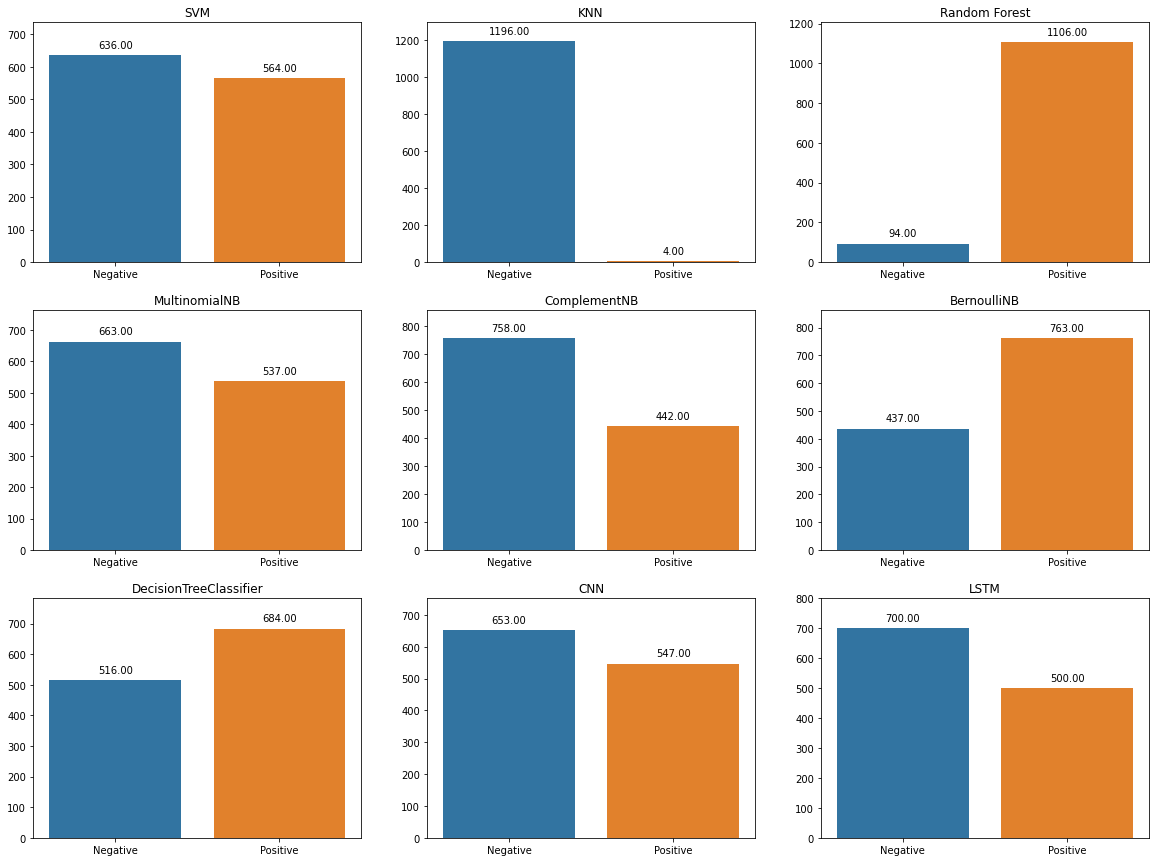

In [ ]:
def count_element(seq) -> dict:
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0)+1
    return hist

labels = ['Negative', 'Positive']
fig=plt.figure(figsize=(20, 15))
columns = 3
rows = 3
suku_ke = 0
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns, i)
  a = count_element(result['Hasil'][suku_ke])
  plt.ylim(0, max(a.values()) + 100)
  plt.title(result['Model'][suku_ke])
  g = sns.barplot(x = labels, y = list(a.values()))
  for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

  suku_ke +=1
plt.savefig('Hasil Prediksi')
plt.show()

In [ ]:
print(a)
a[0]

{0: 700, 1: 500}


700

In [ ]:
positif = []
negatif = []
for val in result['Hasil']:
  count = count_element(val)
  negatif.append(count[0])
  positif.append(count[1])

result['Negatif'] = negatif
result['Positif'] = positif


In [ ]:
result

,Model,Hasil,Negatif,Positif
0,SVM,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",636,564
1,KNN,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4,1196
2,Random Forest,"[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",94,1106
3,MultinomialNB,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...",663,537
4,ComplementNB,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...",758,442
5,BernoulliNB,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",437,763
6,DecisionTreeClassifier,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",516,684
7,CNN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",653,547
8,LSTM,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",700,500


In [ ]:
np.save("pred_result.npy", pred_result)

In [ ]:
result.to_csv("pred_result.csv", index= False)